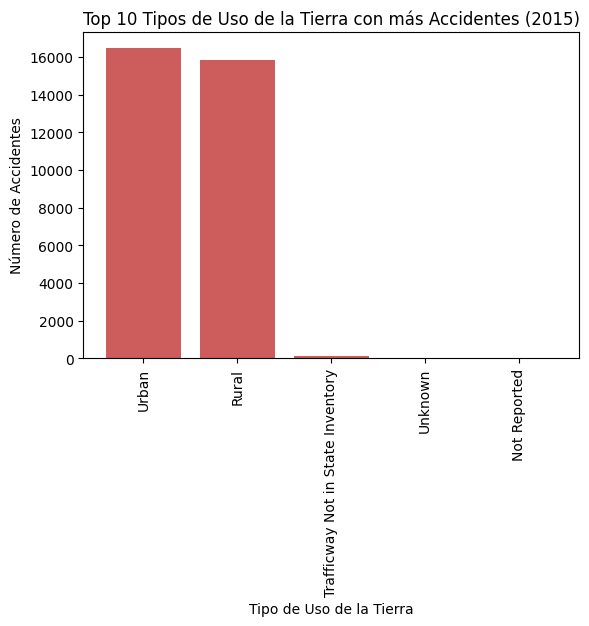

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from google.cloud import bigquery

# Crear cliente de BigQuery
client = bigquery.Client(project='poto-382221')

# Consulta para obtener el número de accidentes por tipo de uso de la tierra
query = """
    SELECT land_use, COUNT(*) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE land_use IN (1, 2, 6, 8, 9)
    GROUP BY land_use
    ORDER BY num_accidents DESC
    LIMIT 10
"""

# Ejecutar la consulta y obtener los resultados
query_job = client.query(query)
results = query_job.result()

# Diccionario para mapear los números de uso de tierra a sus descripciones correspondientes
land_use_dict = {1: 'Rural', 2: 'Urban', 6: 'Trafficway Not in State Inventory', 8: 'Not Reported', 9: 'Unknown'}

# Crear una lista con las descripciones de los tipos de uso de la tierra y otra lista con el número de accidentes correspondiente
land_use = []
num_accidents = []
for row in results:
    land_use.append(land_use_dict[row[0]])
    num_accidents.append(row[1])

# Crear un gráfico de barras con los datos obtenidos
fig, ax = plt.subplots()
ax.bar(land_use, num_accidents, color='indianred')
ax.set_title("Top 10 Tipos de Uso de la Tierra con más Accidentes (2015)")
ax.set_xlabel("Tipo de Uso de la Tierra")
ax.set_ylabel("Número de Accidentes")

# Ajustar el espacio entre las barras
plt.subplots_adjust(bottom=0.2)

# Rotar las etiquetas del eje x para que se lean verticalmente
plt.xticks(rotation=90)

plt.show()


Lo siguiente es para el grafico interactivo


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [8]:
from google.cloud import bigquery
import plotly.graph_objects as go

# Crear cliente de BigQuery
client = bigquery.Client(project='poto-382221')

# Consulta para obtener el número de accidentes por tipo de uso de la tierra
query = """
    SELECT land_use, COUNT(*) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE land_use IN (1, 2, 6, 8, 9)
    GROUP BY land_use
    ORDER BY num_accidents DESC
    LIMIT 10
"""

# Ejecutar la consulta y obtener los resultados
query_job = client.query(query)
results = query_job.result()

# Diccionario para mapear los números de uso de tierra a sus descripciones correspondientes
land_use_dict = {1: 'Rural', 2: 'Urban', 6: 'Trafficway Not in State Inventory', 8: 'Not Reported', 9: 'Unknown'}

# Crear una lista con las descripciones de los tipos de uso de la tierra y otra lista con el número de accidentes correspondiente
land_use = []
num_accidents = []
for row in results:
    land_use.append(land_use_dict[row[0]])
    num_accidents.append(row[1])

# Crear un gráfico de barras con los datos obtenidos
fig = go.Figure([go.Bar(x=land_use, y=num_accidents)])
fig.update_layout(title="Top 10 Tipos de Uso de la Tierra con más Accidentes (2015)",
                  xaxis_title="Tipo de Uso de la Tierra",
                  yaxis_title="Número de Accidentes",
                  legend_title="Uso de la Tierra")
fig.update_traces(marker_color='indianred')
fig.show()

